### 1. 목적
- 버섯의 특성들을 활용하여 독성이 있는 버섯과 식용버섯을 분류
- 결정트리 모델 시각화
- 특성선택 해보기

### 데이터 수집
- 데이터 불러오기
- 전체컬럼, 행의 숫자 파악
- 결측치, 기술통계 확인

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.shape #행과 열 확인

(8124, 23)

In [5]:
# 결측치 확인 ---> 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe() #데이터가 object라서

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 3. 데이터 전처리
 - 학습데이터라 필요없음

### 4. EDA(탐색적 분석)

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

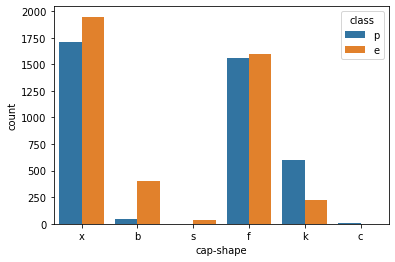

In [8]:
sns.countplot(data=df, x = 'cap-shape', hue = 'class') #x축 설정, 해당 컬럼의 uniqeu 값들이 들어가서 출력, 
                                                       #unique 값에 대한 각각의 bar 차트와 범례가 표시



### 5. 모델링 - 모델생성

In [9]:
x = df.iloc[:,1:]
y = df['class']

In [10]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [11]:
print(x.shape)
print(y.shape)

(8124, 22)
(8124,)


### 문자 데이터를 숫자로 변환

#### 레이블 인코딩
- 숫자의 크고 작음에 대한 특성이 작용함(숫자로 바뀌다보니)
- 회귀와 같이 연속된 실수를 다루는 알고리즘에서는 1,2,3,... 커지는 숫자가 숫자에 따른 순서나 중요도로 인식될 수 있어서 잘못된 결과가 나올 수 있음
- 레이블보다는 주로 one-hot 사용..

In [12]:
x['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [13]:
x['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [14]:
x['cap-shape'].map({'x':0, 'f':1, 'k':2, 'b':3, 's':4, 'c':5})

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()
encoder.fit(x['cap-shape']) #레이블인코딩은 컬럼벌로 다 따로 인코딩 해야함
labels = encoder.transform(x['cap-shape']) #인코더의 unique값들을 숫자로 변환

In [17]:
print(labels)

[5 5 0 ... 2 3 5]


#### 원핫인코딩
- 모든 데이터를 0과 1로 변환
- 기계는 모든 데이터를 이진법으로 처리하기 때문에 레이블보다는 원핫인코딩을 사용

In [18]:
pd.set_option('display.max_columns', None) #none을 넣으면 전체, 숫자넣으면 그 숫자만큼 보임

In [19]:
x_one_hot = pd.get_dummies(x)

In [20]:
x_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_one_hot, y, test_size=0.3, random_state=0)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5686, 117)
(5686,)
(2438, 117)
(2438,)


In [23]:
tr = DecisionTreeClassifier()
tr.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
tr.score(x_train, y_train)
tr.score(x_test, y_test) # test가 1.0이 나왔다? 하이퍼파라미터 조정 ㄱ

1.0

### 하이퍼파라미터 조정

In [25]:
tr2 = DecisionTreeClassifier(max_depth = 2, max_leaf_nodes = 3, min_samples_leaf = 4).fit(x_train, y_train)

In [26]:
tr2.score(x_test, y_test) #조정 후 과대적합 해소

0.9454470877768663

In [27]:
# from sklearn.tree import export_graphviz
# import graphviz
# import matplotlib.pyplot as plt #트리모델 시각화
# from matplotlib import rc
# rc('font', family="Malgun Gothic")
# plt.rcParams['axes.unicode_minus'] = False

In [28]:
# export_graphviz(tr2, out_file='mushroom.dot',class_names=['독버섯','버섯'], feature_names=df.feature_names, impurity=False, filled=True)

In [29]:
# with open('mushroom.dot', encoding='utf-8') as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [30]:
train_list = []
test_list = []
for k in range(1,11,1):
    #모델 생성 및 하이퍼파라미터 변수 넣음
    tr3 = DecisionTreeClassifier(max_depth=k)
    tr3.fit(x_train, y_train)
    
    train_score = tr3.score(x_train, y_train)
    train_list.append(train_score)
    
    test_score = tr3.score(x_test, y_test)
    test_list.append(test_score)

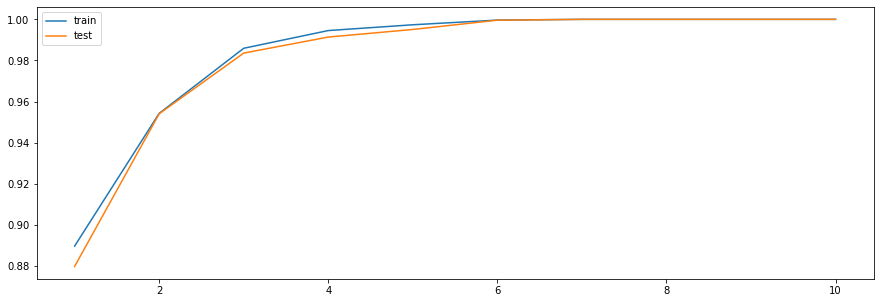

In [31]:
plt.figure(figsize=(15,5))
plt.plot(range(1,11,1), train_list, label = 'train')
plt.plot(range(1,11,1), test_list, label = "test")
plt.legend()
plt.show() #max_depth를 6 미만으로 설정해줘야함을 알 수 있음

### 특성선택
- 자동학습 모델의 특성중요도(각 특성들은 0~1 사이의 중요도 값을 가짐, 모든 중요도의 합이 1이 됨)
- 0이 나오는 컬럼은 모델이 정답을 예측하는데 전혀 도움이 되지 않는 특성들
- 1은 완벽하게 정답을 예측해내는 특성(1이 나오면 나머지 특성은 필요가 없다)

In [32]:
fi = tr.feature_importances_
fi

array([0.00000000e+00, 7.02761782e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10475831e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.11012008e-03, 0.00000000e+00,
       0.00000000e+00, 1.04011524e-02, 0.00000000e+00, 6.24704267e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.66823952e-03,
       1.87982024e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.69465645e-01, 0.00000000e+00, 0.00000000e+00,
      

In [33]:
len(fi)

117

In [34]:
x_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [35]:
fi_df = pd.DataFrame(fi, index=x_one_hot.columns)

In [38]:
# 내림차순 정렬
fi_df = fi_df.sort_values(by=0, ascending = False)

In [39]:
fi_df

,0
odor_n,0.624704
stalk-root_c,0.169466
stalk-surface-below-ring_y,0.100237
spore-print-color_r,0.034145
spore-print-color_u,0.023820
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-spacing_w,0.000000


In [40]:
# 불리언 인덱싱
fi_df[fi_df.values>=0.01]

,0
odor_n,0.624704
stalk-root_c,0.169466
stalk-surface-below-ring_y,0.100237
spore-print-color_r,0.034145
spore-print-color_u,0.023820
stalk-color-above-ring_c,0.018234
odor_l,0.010401


In [42]:
#tree 모델내부 시각화 표를 보면 가장 중요도가 높은 컬럼인 odor_n을 먼저 고려해서 분류한 것을 알 수 있음
# 중요도 수치가 가장 높은 특성을 먼저 고려해야 가장 효율적으로 분류할 수 있음
# 현재 mushroom 데이터는 odor_n 컬럼이 0.6 이상의 중요도를 혼자 차지하고 있기 때문에 비교적 학습이 용이하여 정확도가 100%가 나옴을 확인

In [43]:
fi3 = tr3.feature_importances_
fi3

array([0.00000000e+00, 7.02761782e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10475831e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.38849332e-03, 9.11012008e-03, 0.00000000e+00,
       0.00000000e+00, 1.04011524e-02, 0.00000000e+00, 6.24704267e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.87982024e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.69465645e-01, 0.00000000e+00, 8.51430445e-02,
      

In [44]:
fi_df3 = pd.DataFrame(fi3, index=x_one_hot.columns)

In [45]:
fi_df3

,0
cap-shape_b,0.000000
cap-shape_c,0.000703
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [48]:
#내림차순
fi_df3 = fi_df3.sort_values(by=0, ascending=False) #by값은 어떤 열을 기준으로 할 것인지 설정, False는 내림차순 True는 오름차순
fi_df3

,0
odor_n,0.624704
stalk-root_c,0.169466
stalk-root_r,0.085143
spore-print-color_r,0.034145
stalk-surface-below-ring_y,0.033329
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_b,0.000000
gill-spacing_w,0.000000


In [50]:
fi_df3[fi_df3.values>0.01]

,0
odor_n,0.624704
stalk-root_c,0.169466
stalk-root_r,0.085143
spore-print-color_r,0.034145
stalk-surface-below-ring_y,0.033329
spore-print-color_u,0.023820
odor_l,0.010401
